In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

%matplotlib inline
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('DATA/c16_18_prep.csv')
data.drop(['Unnamed: 0'], axis=1,inplace = True)
data.head()

,ACC,CAMP,LVL,AWARD,LOA,STAFF,PREVSTAFF,BALS,GAS,PAS,...,DL_T10,DL_T11,DL_T12,DL_T13,DL_T14,DL_T15,DL_T16,DL_T17,DL_T18,DL_T19
0,0,0,2,267.94,76,8,13,25277,25277,4047,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1102.76,76,41,44,87604,87604,2459,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,417.18,76,14,19,34424,34424,2234,...,0,0,0,0,0,0,0,0,0,0
3,3,0,3,1307.48,76,35,36,258647,258647,1707,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2,914.42,76,21,21,72781,72781,2325,...,0,0,0,0,0,0,0,0,0,0


In [3]:
%%time
data2 = data.copy()
data2['prev_level'] = data2.groupby(['ACC'])['LVL'].shift()
data2['prev_level_diff'] = data2.groupby(['ACC'])['prev_level'].diff()
data2 = data2.dropna()
data2.head()

Wall time: 17.4 s


In [4]:
data2[data2['ACC'] == 152][['LVL', 'prev_level', 'CAMP']]

,LVL,prev_level,CAMP
69563,3,3.0,2
106940,3,3.0,3
143775,3,3.0,4
180458,3,3.0,5
215957,3,3.0,6
251458,3,3.0,7
285829,3,3.0,8
318530,3,3.0,9
349761,3,3.0,10
381076,3,3.0,11


In [5]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [6]:
def plot_difference(df1, df2, camp):
    
    grouped = df1.groupby(df1).count()
    grouped2 = df2.groupby(df2).count()
    result = pd.DataFrame(grouped)
    result2 = pd.DataFrame(grouped2)
    
    result.columns = ['count']
    result['lvl'] = result.index
    result['values'] = 'prediction'
    
    result2.columns = ['count']
    result2['lvl'] = result2.index
    result2['values'] = 'actual'
    
    result_r = pd.concat([result, result2])
    
    import seaborn as sns
    sns.set(style="whitegrid")


    # Draw a nested barplot to show survival for class and sex
    g = sns.catplot(x="lvl", y="count", hue="values", data=result_r,
                height=8, kind="bar", palette="muted",  aspect=1.8)
    g.despine(left=True)
    g.set_ylabels(camp)
    
    return 

CAMP 3 - Error 0.37869
CAMP 4 - Error 0.35622
CAMP 5 - Error 0.34900
CAMP 6 - Error 0.36981
CAMP 7 - Error 0.34832
CAMP 8 - Error 0.40694
CAMP 9 - Error 0.33812
CAMP 10 - Error 0.37532
CAMP 11 - Error 0.38535
CAMP 12 - Error 0.35772
CAMP 13 - Error 0.35966
CAMP 14 - Error 0.36077
CAMP 15 - Error 0.36204
Mean Error = 0.36523
Wall time: 4.58 s


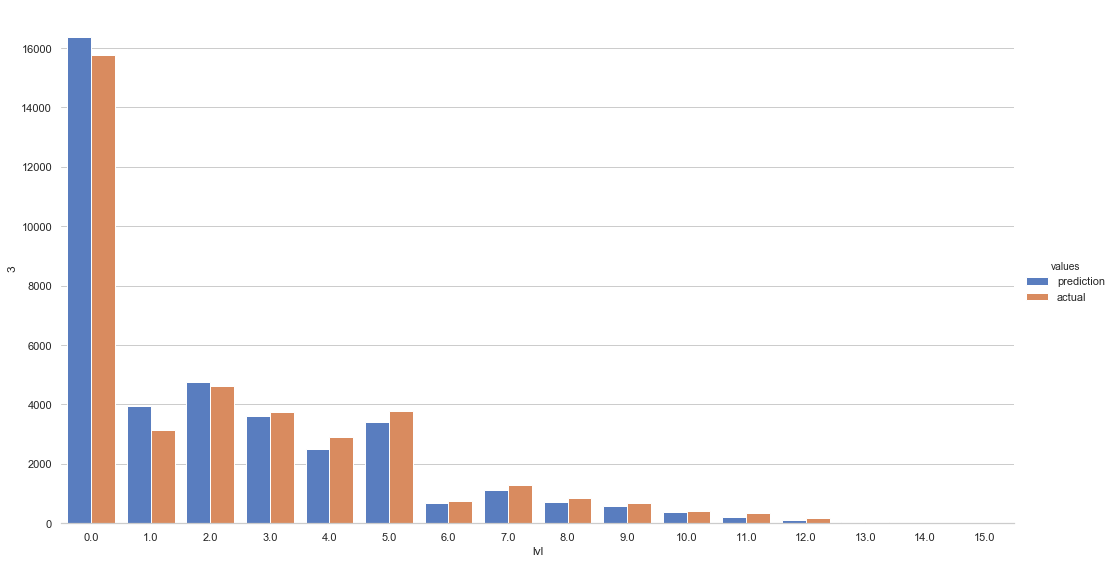

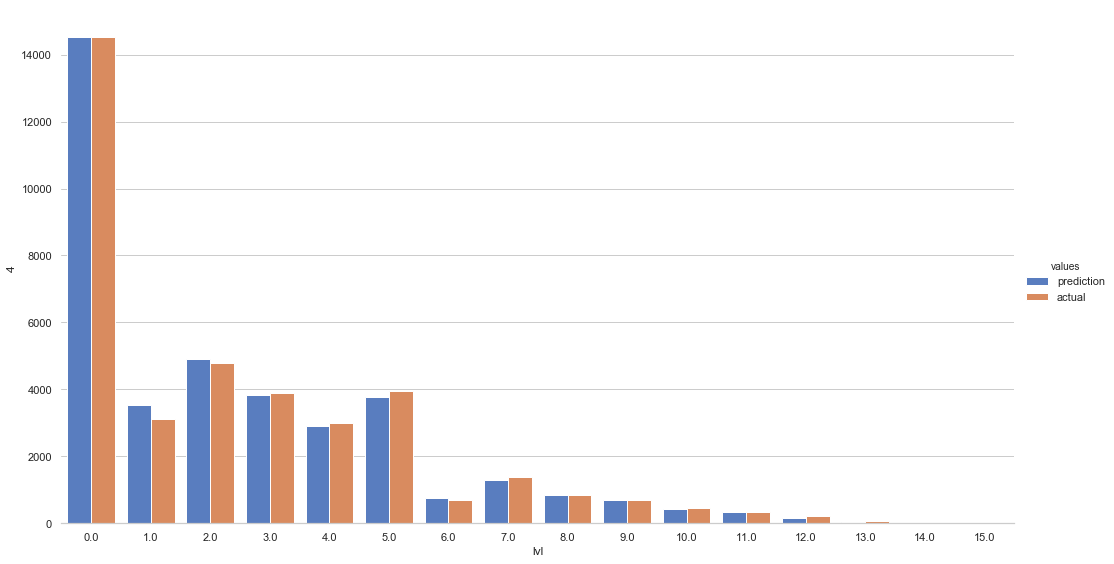

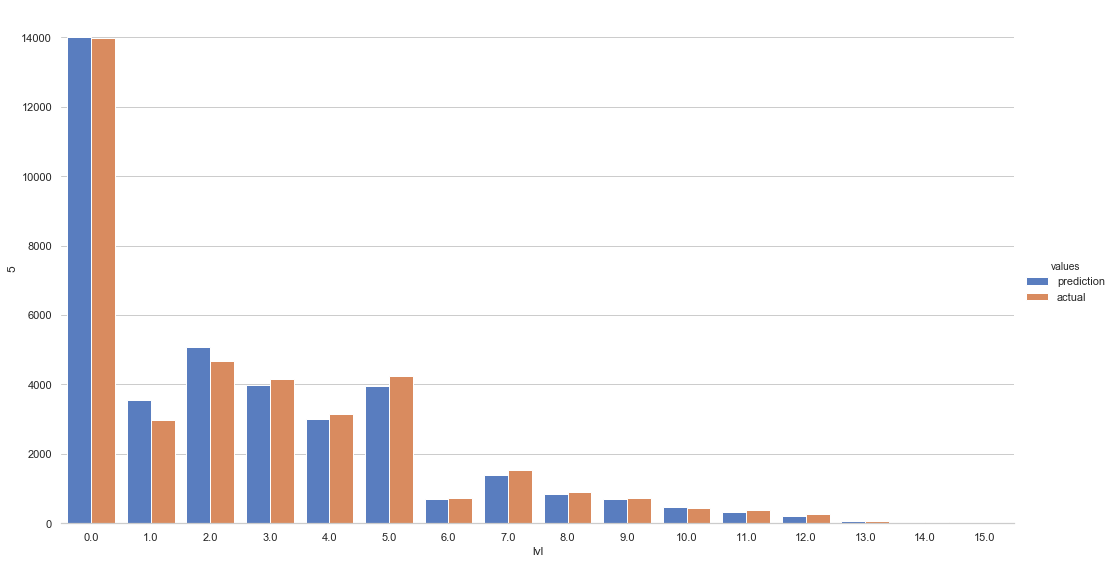

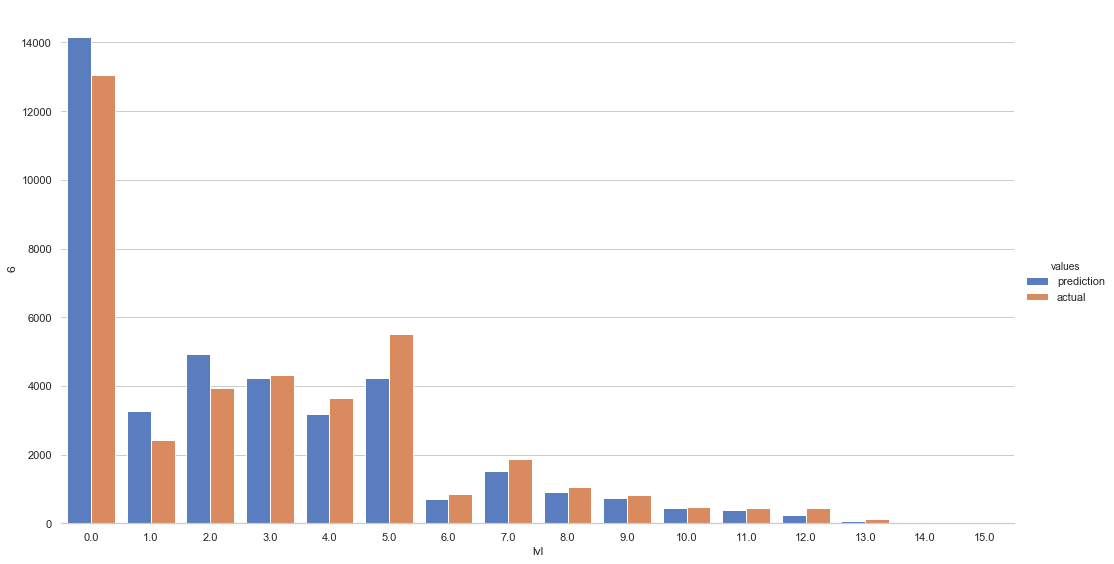

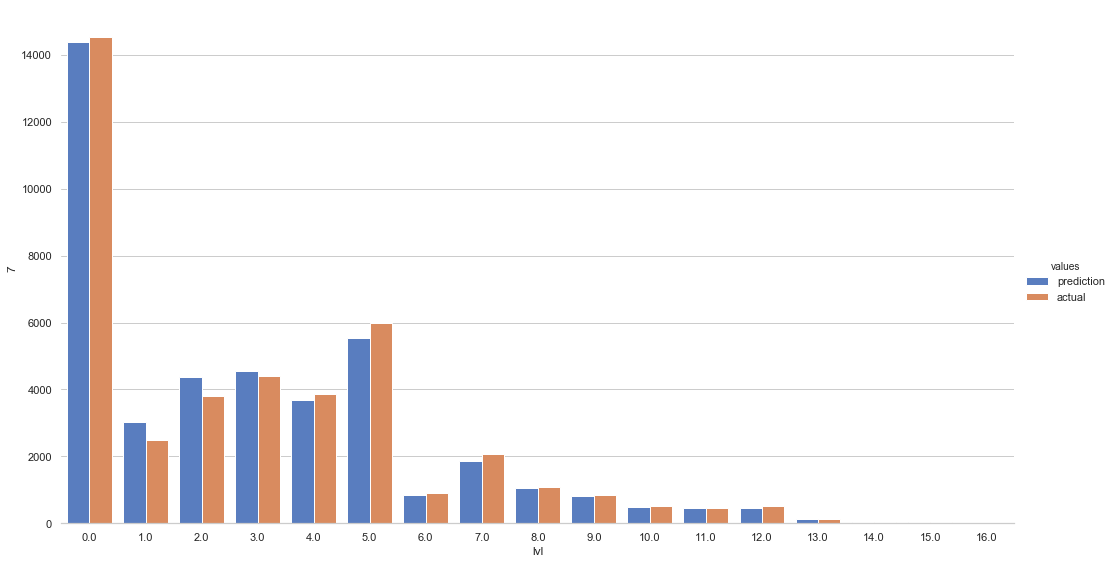

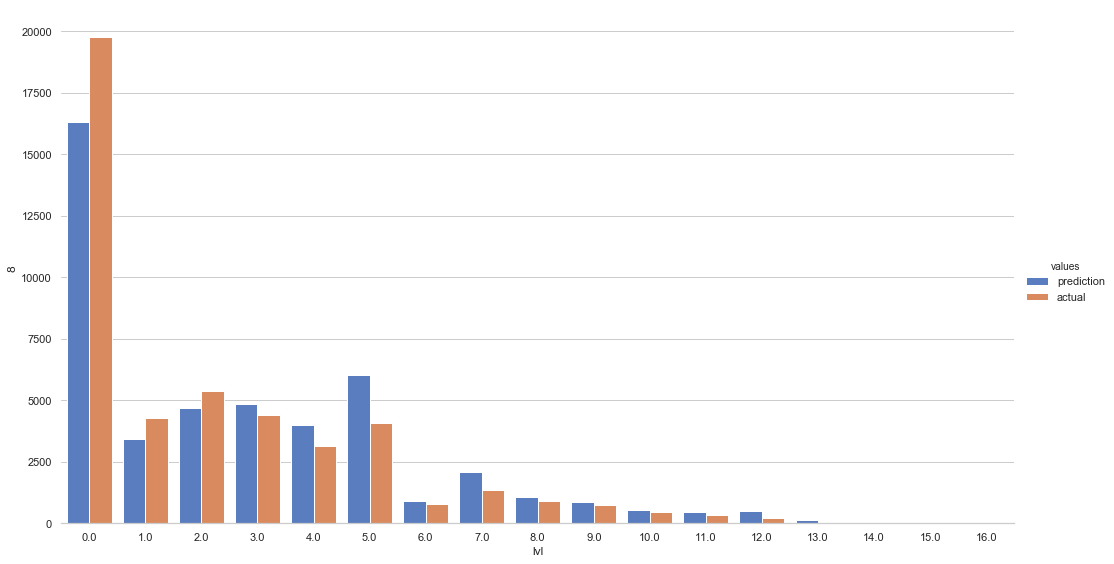

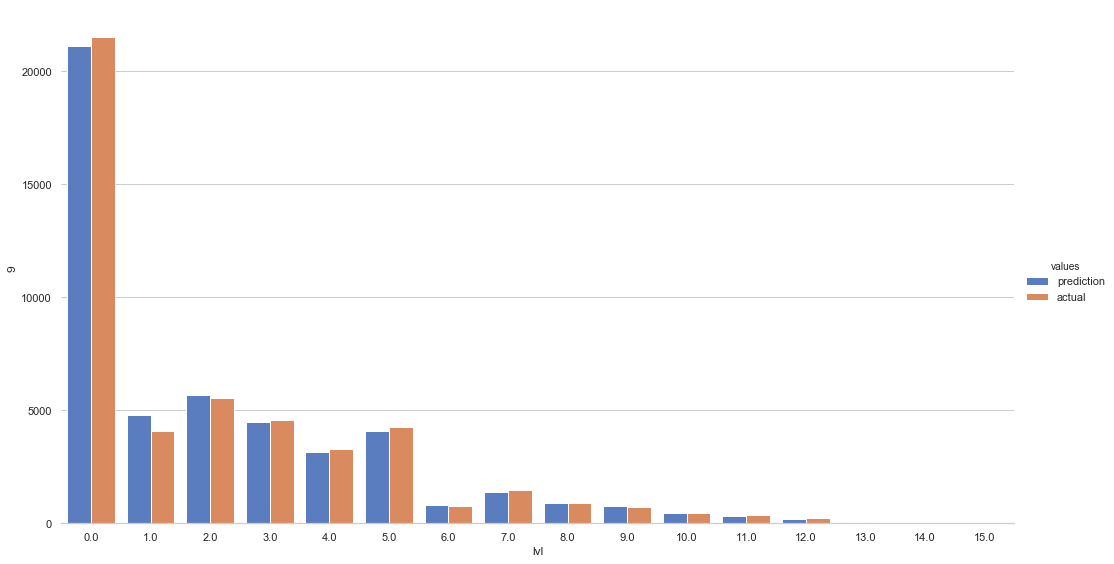

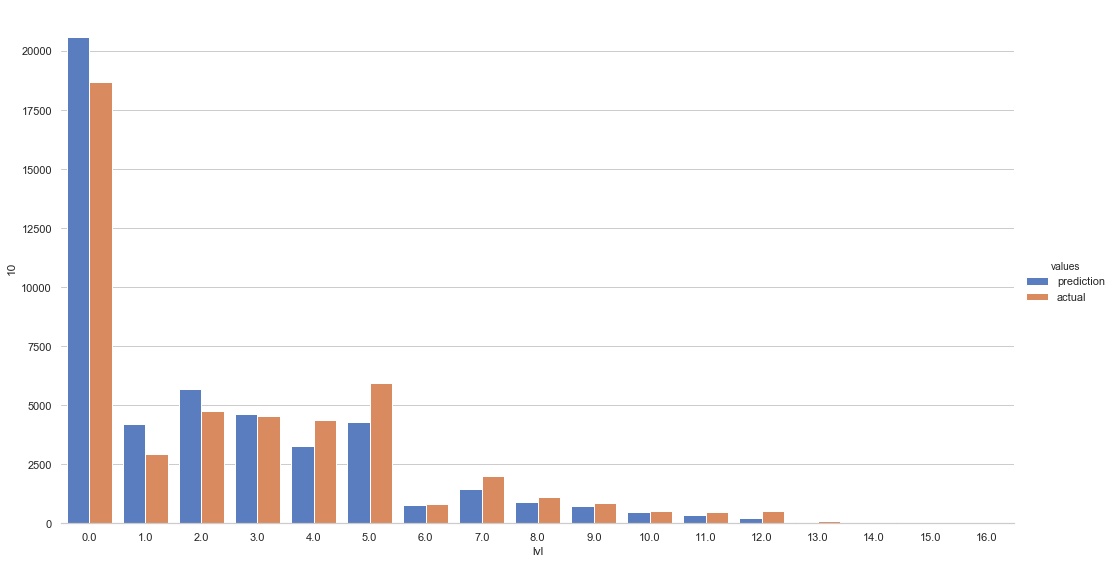

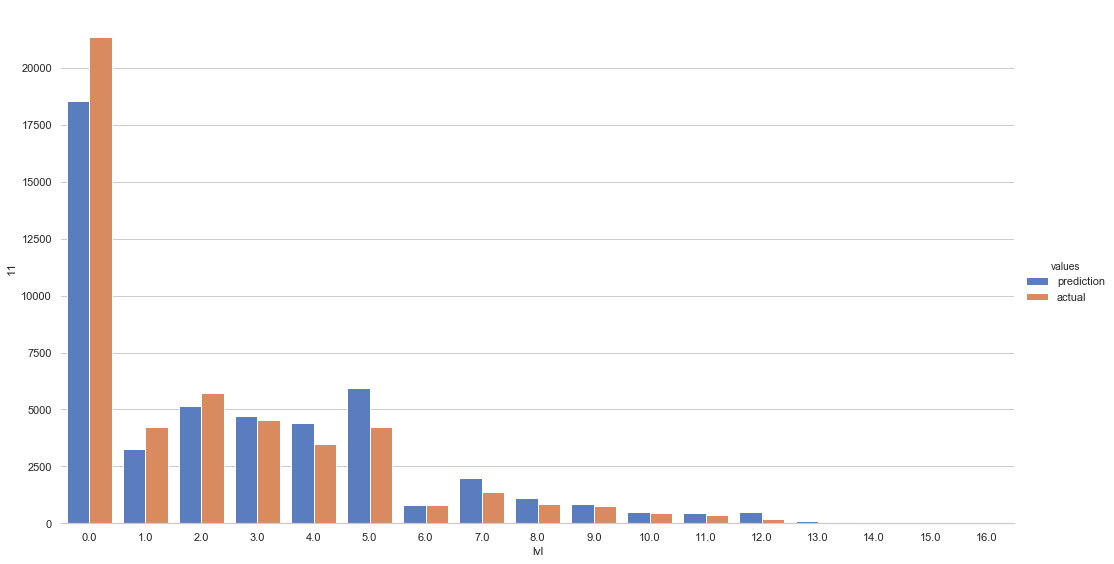

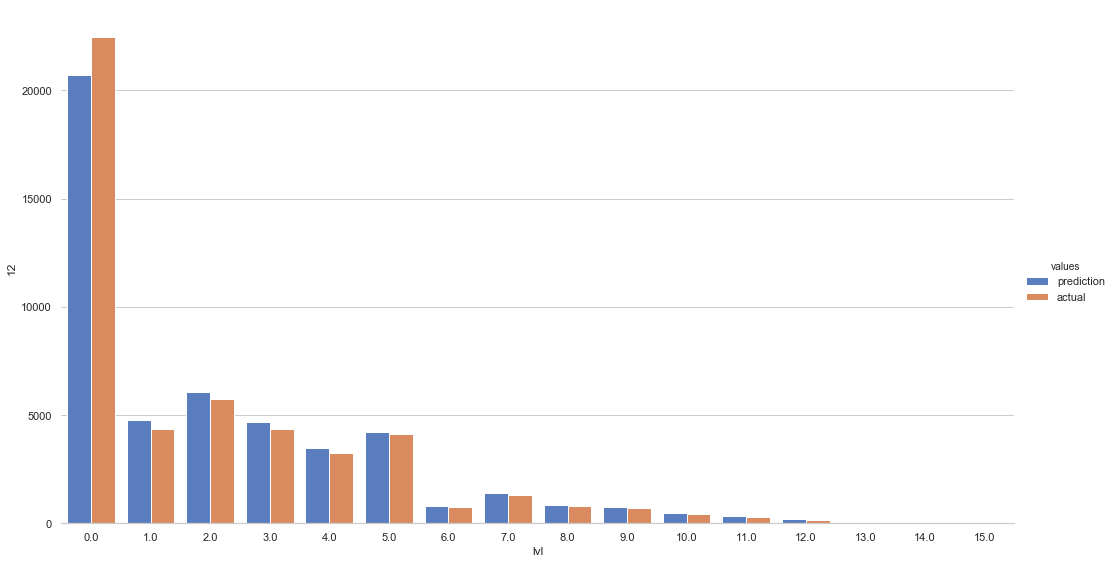

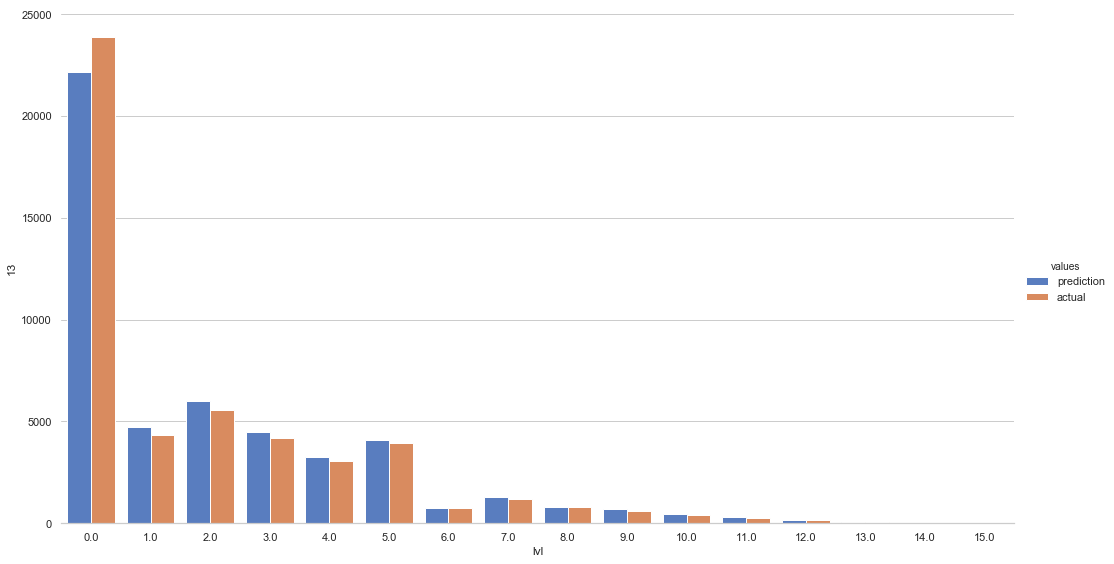

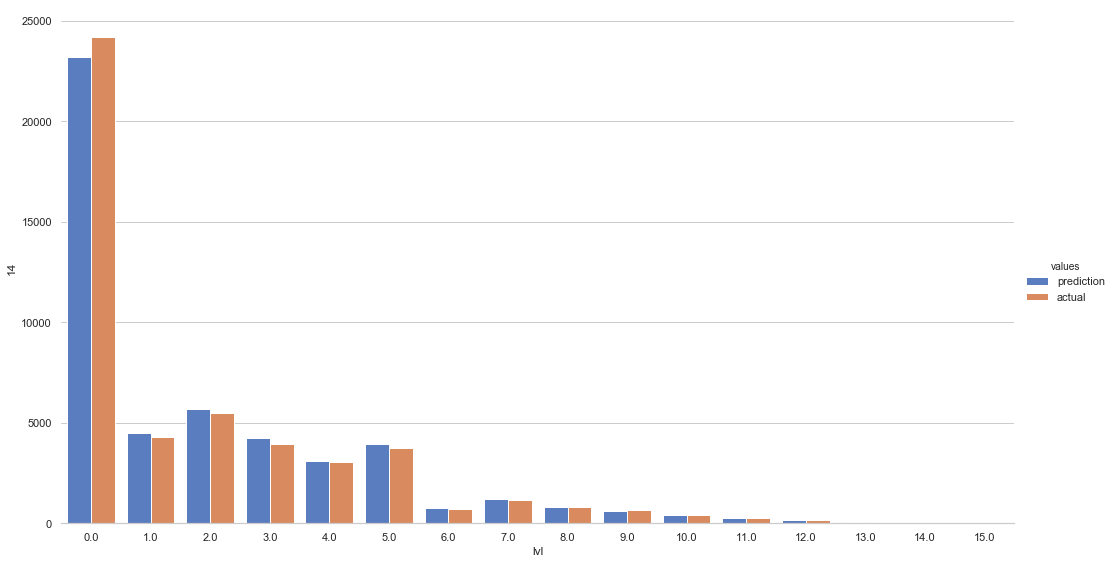

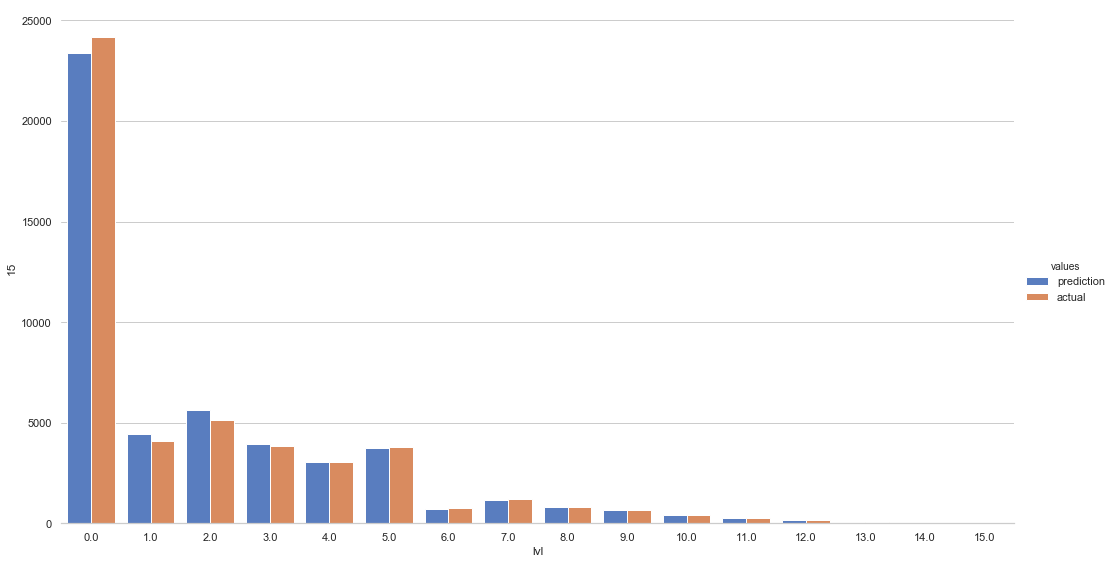

In [7]:
%%time
mean_error = []
df_mean = pd.DataFrame(columns=['LVL_mean'])
for camp in range(3,16):
    train = data2[data2['CAMP'] < camp]
    val = data2[data2['CAMP'] == camp]
    
    p = val['prev_level'].values

    error = rmsle(val['LVL'].values, p)
    plot_difference(val['prev_level'], val['LVL'], camp)
    print('CAMP %d - Error %.5f' % (camp, error))
    mean_error.append(error)

print('Mean Error = %.5f' % np.mean(mean_error))

Week 3 - Error 0.04635
Week 4 - Error 0.05243
Week 5 - Error 0.04820
Week 6 - Error 0.04841
Week 7 - Error 0.03667
Week 8 - Error 0.03949
Week 9 - Error 0.03772
Week 10 - Error 0.04723
Week 11 - Error 0.04756
Week 12 - Error 0.03746
Week 13 - Error 0.02797
Week 14 - Error 0.03993
Week 15 - Error 0.04016
Mean Error = 0.04227
Wall time: 2min 10s


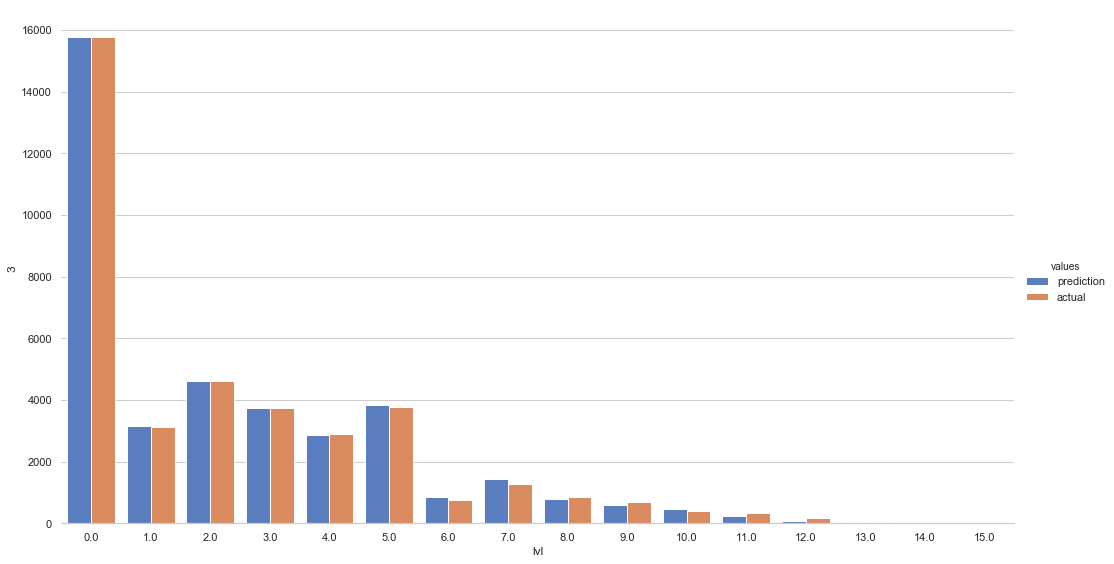

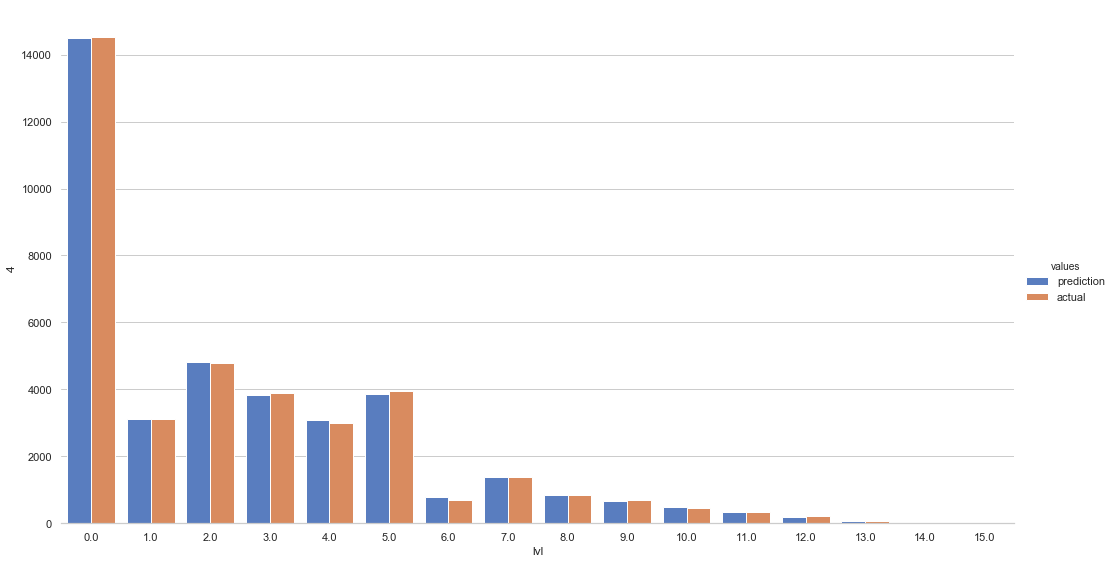

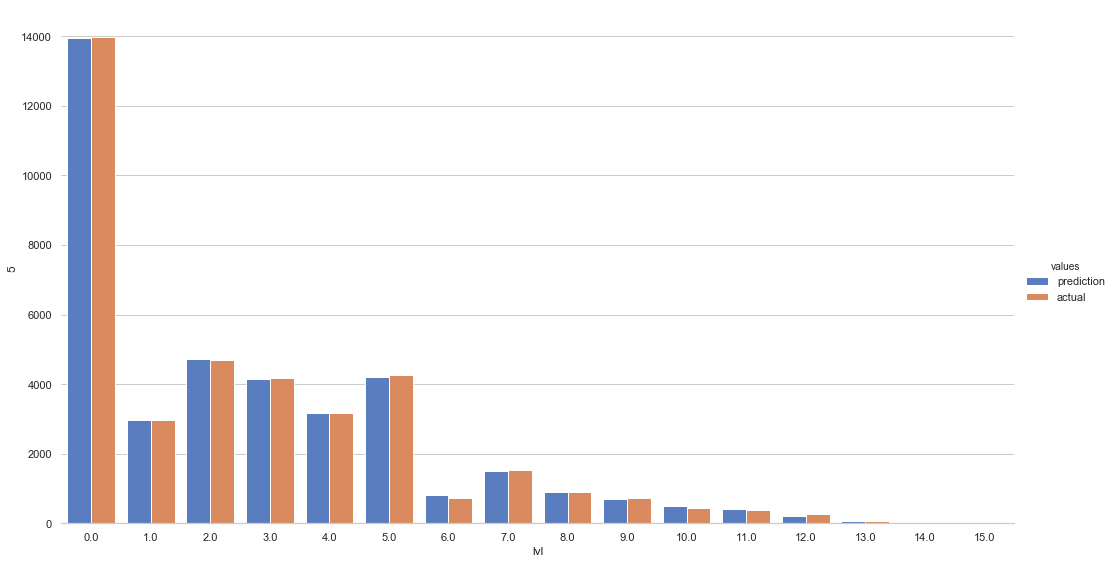

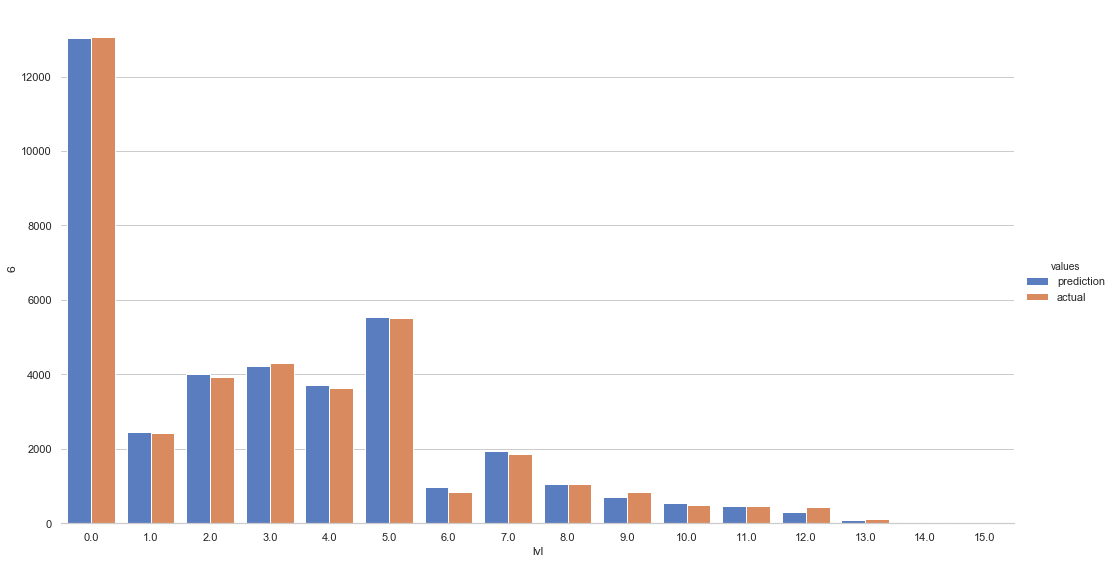

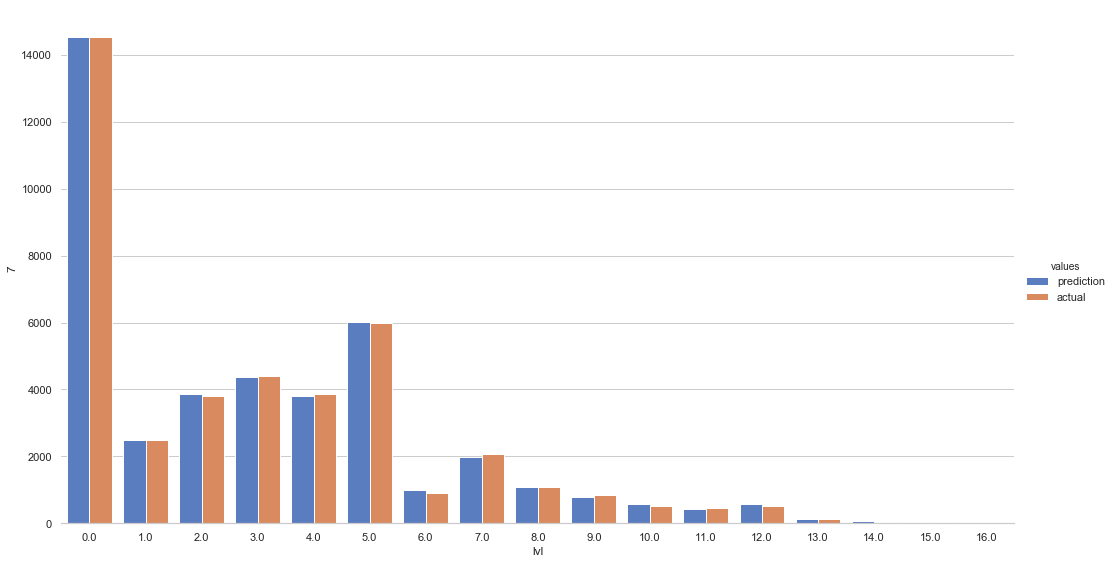

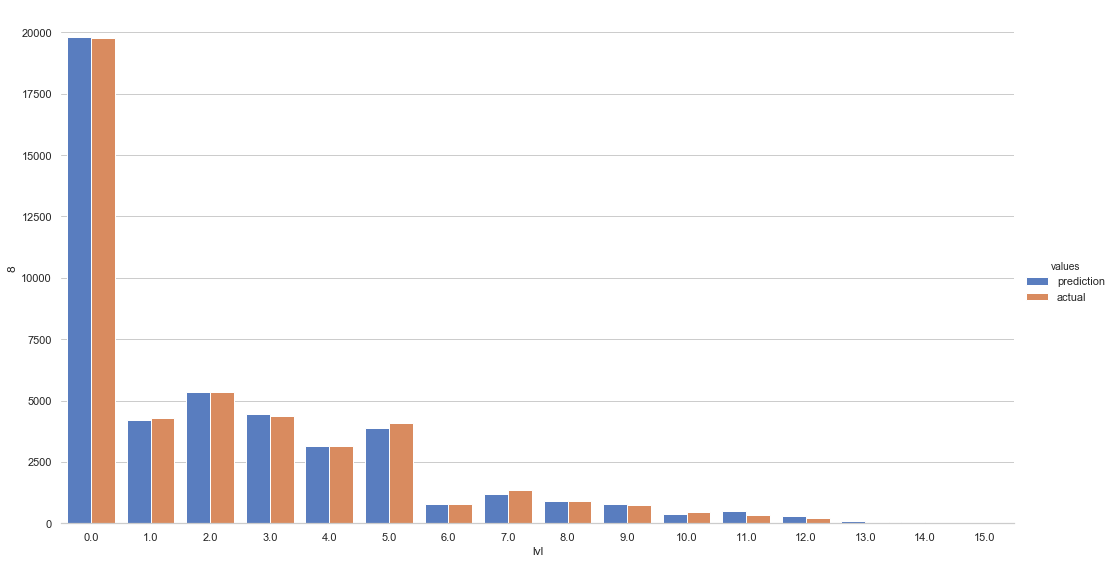

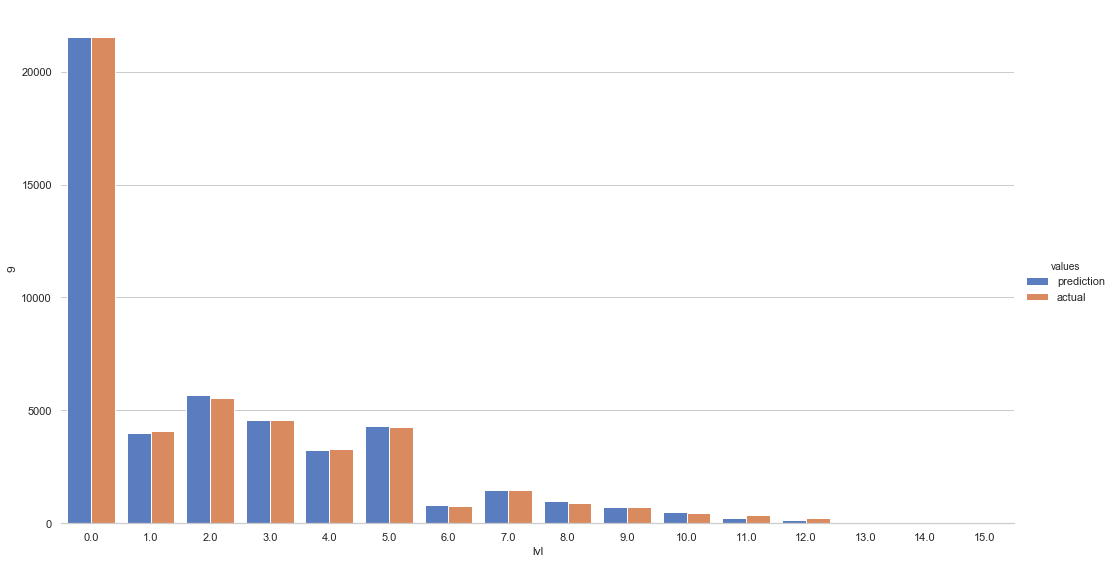

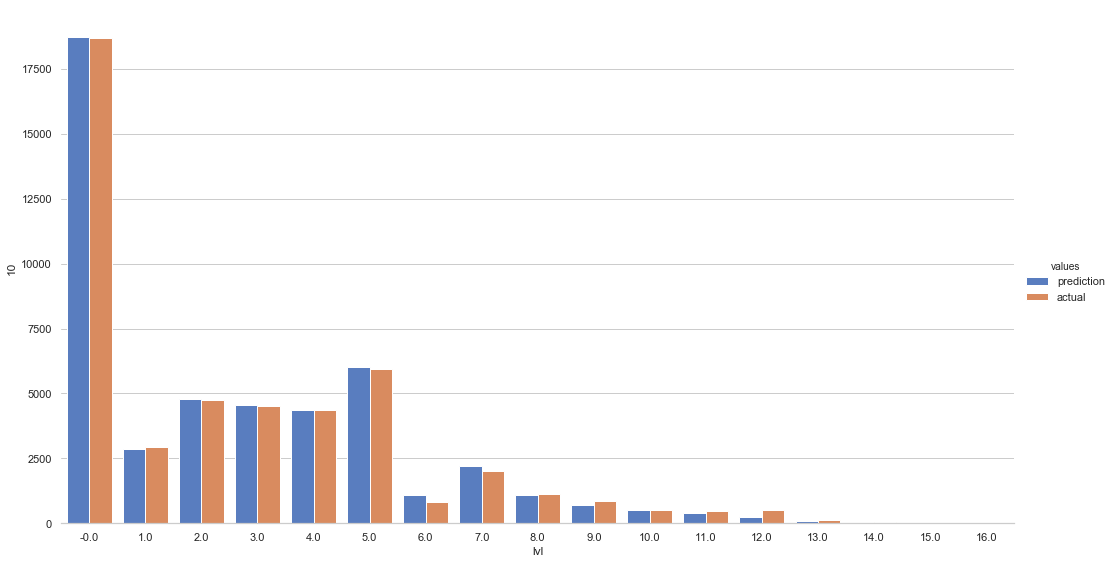

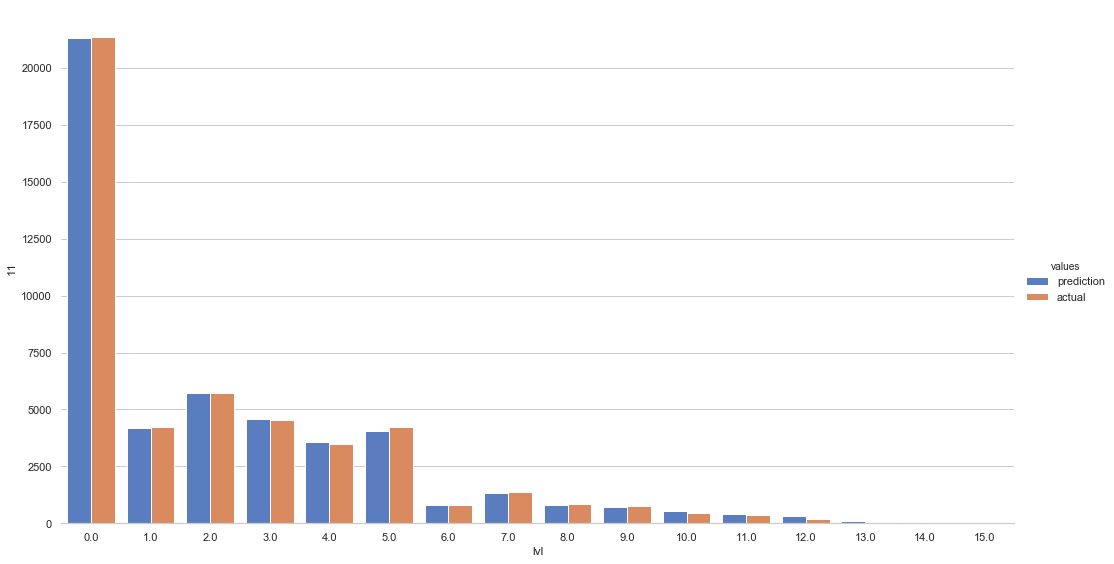

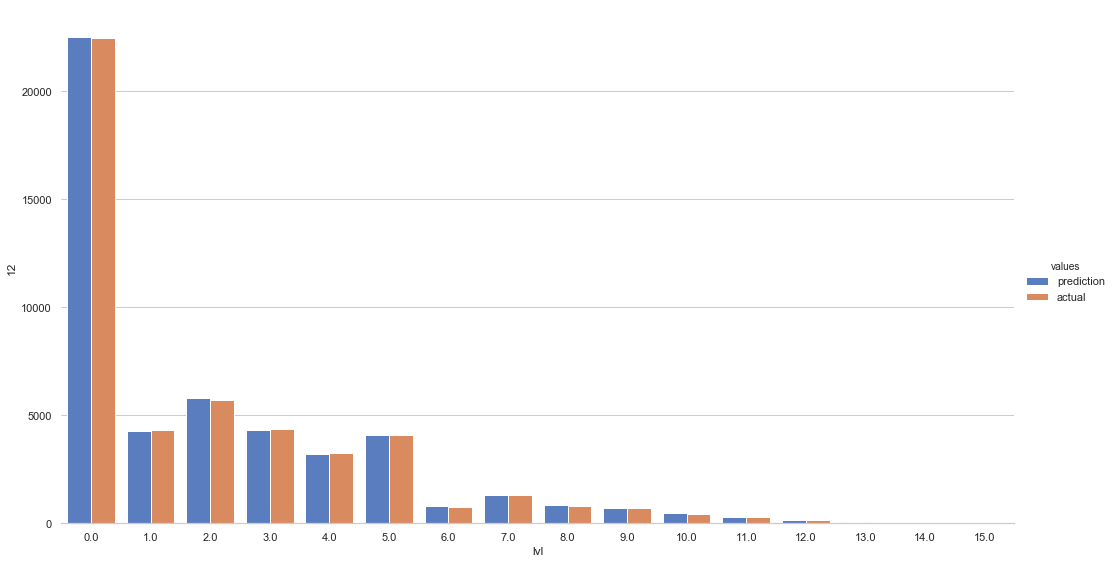

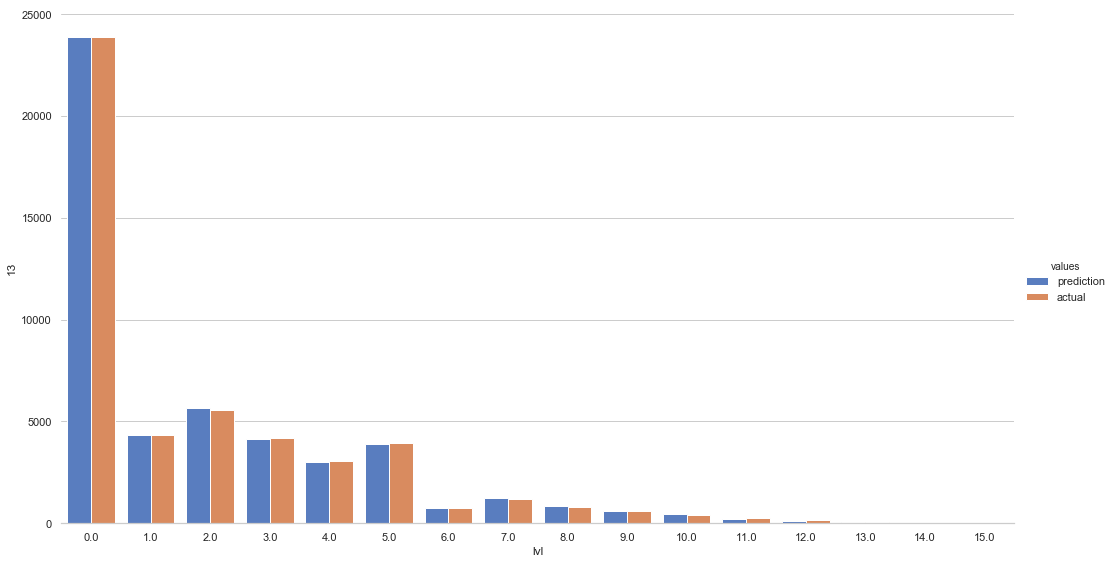

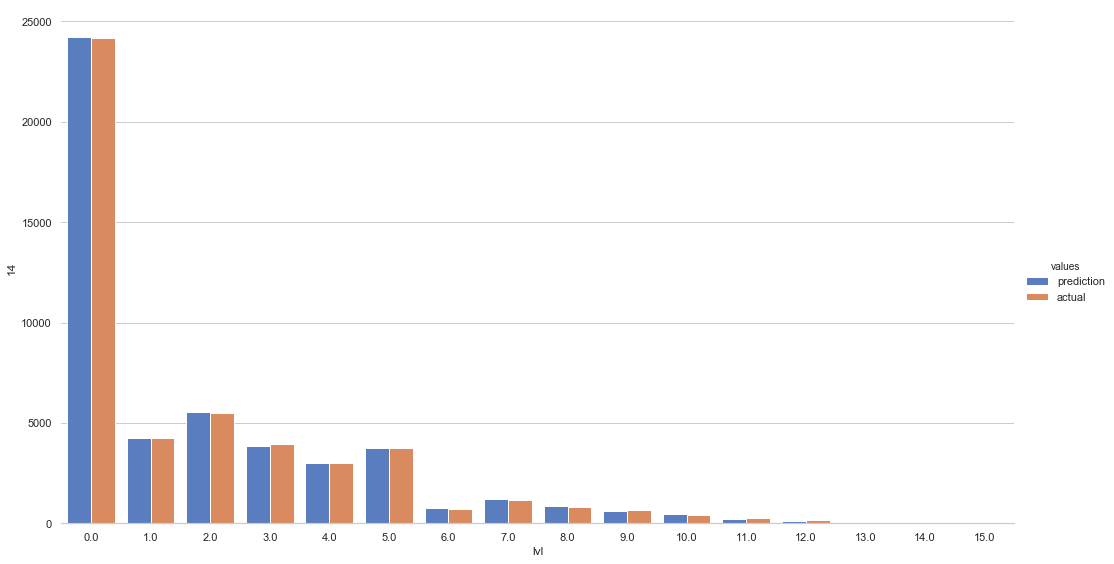

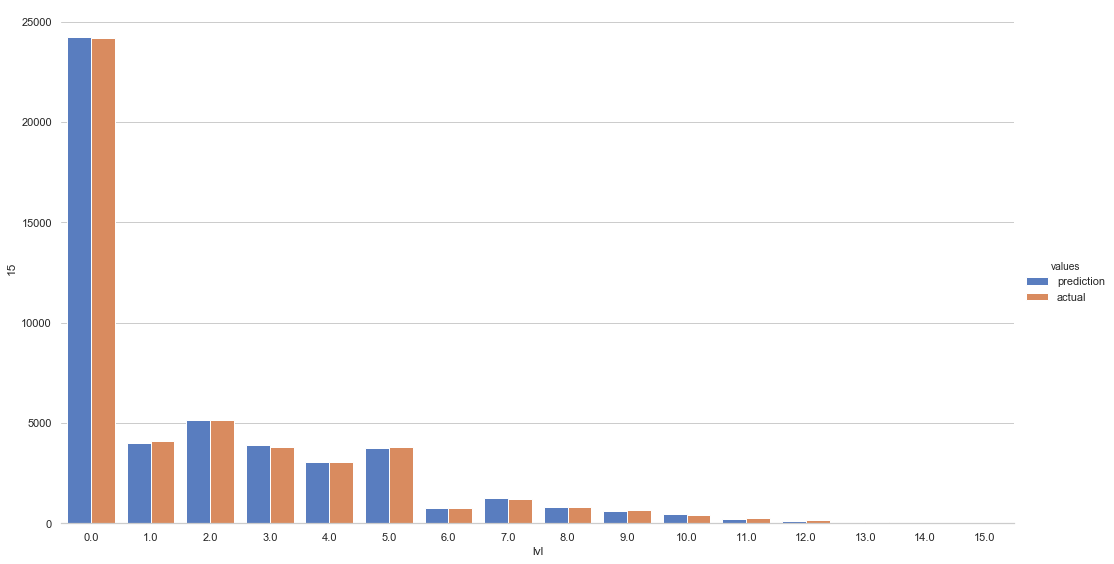

In [8]:
%%time
mean_error = []
for camp in range(3,16):
    train = data2[data2['CAMP'] < camp]
    val = data2[data2['CAMP'] == camp]
    
    xtr, xts = train.drop(['LVL'], axis=1), val.drop(['LVL'], axis=1)
    ytr, yts = train['LVL'].values, val['LVL'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))

    p = np.expm1(mdl.predict(xts))
    p = np.rint(p)
    predict = pd.Series(p)
    plot_difference(predict, val['LVL'], camp)
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (camp, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))



Week 3 - Error 0.03909
Week 4 - Error 0.02962
Week 5 - Error 0.03098
Week 6 - Error 0.03978
Week 7 - Error 0.03106
Week 8 - Error 0.02348
Week 9 - Error 0.02066
Week 10 - Error 0.03406
Week 11 - Error 0.02436
Week 12 - Error 0.01887
Week 13 - Error 0.01783
Week 14 - Error 0.02142
Week 15 - Error 0.02436
Mean Error = 0.02735
Wall time: 59min 15s


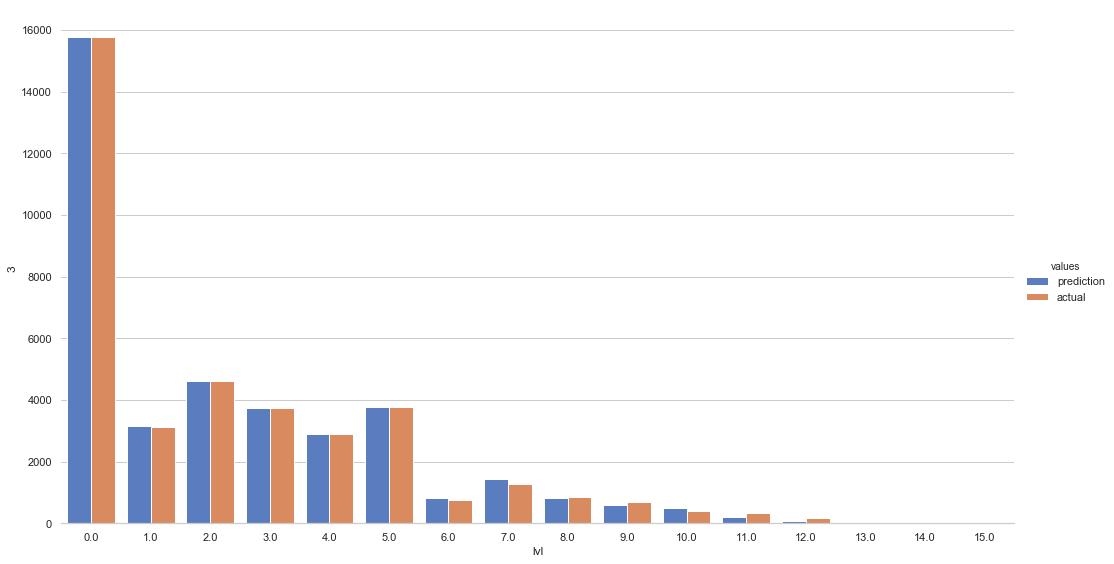

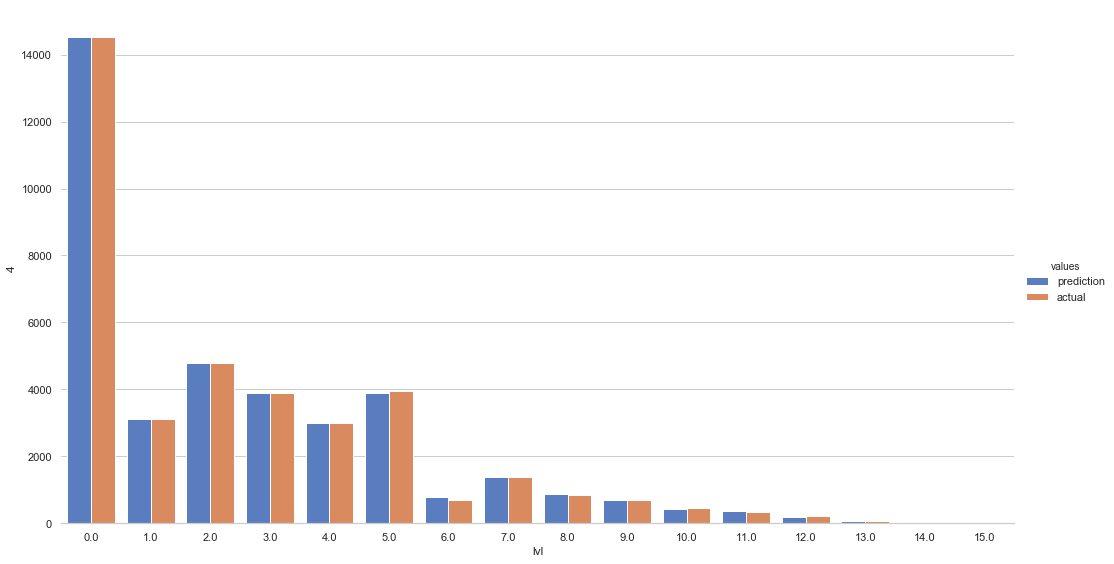

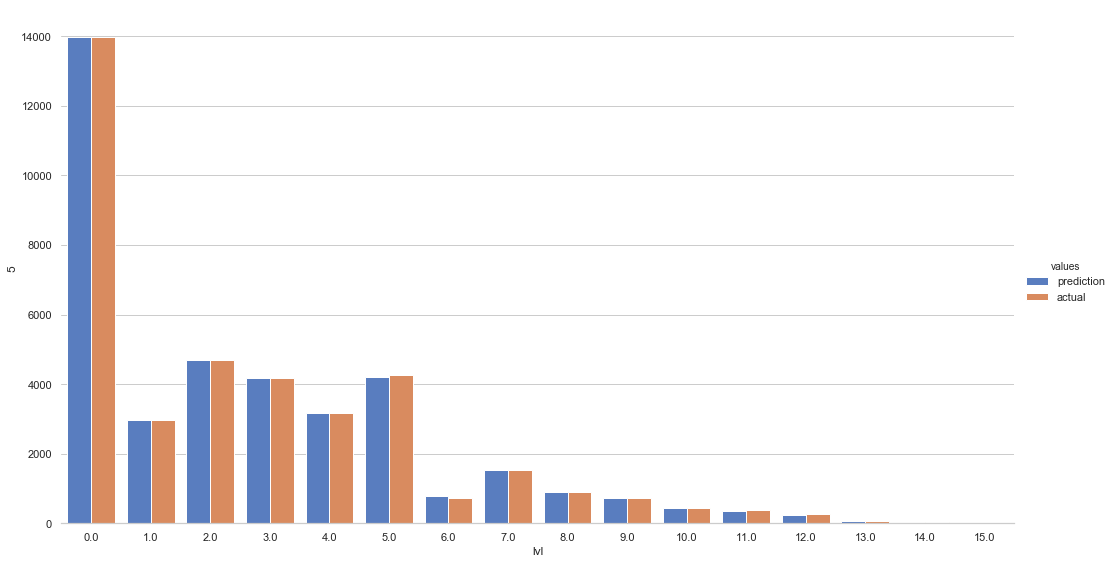

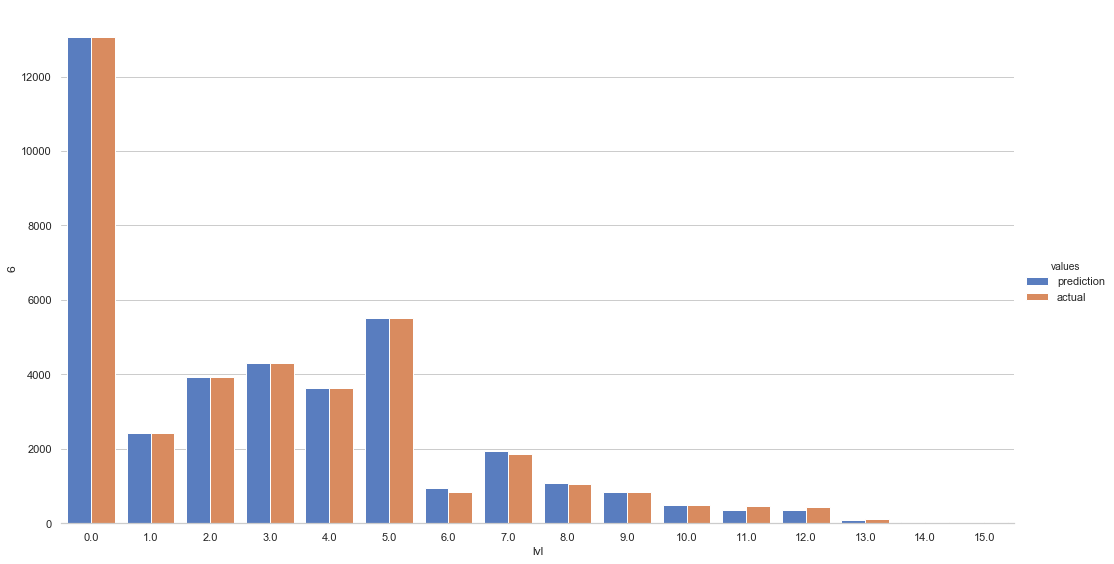

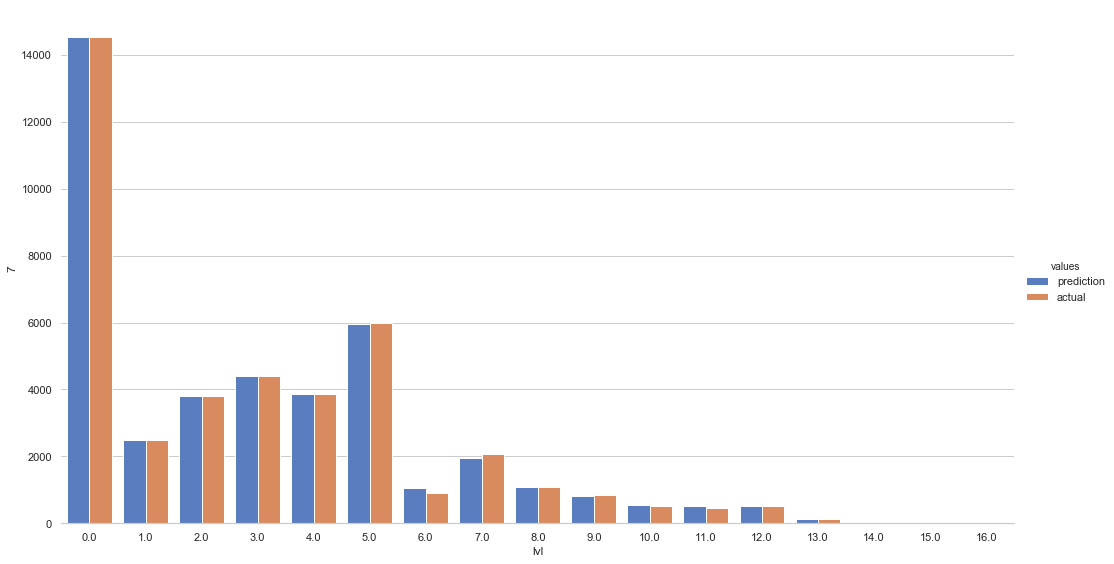

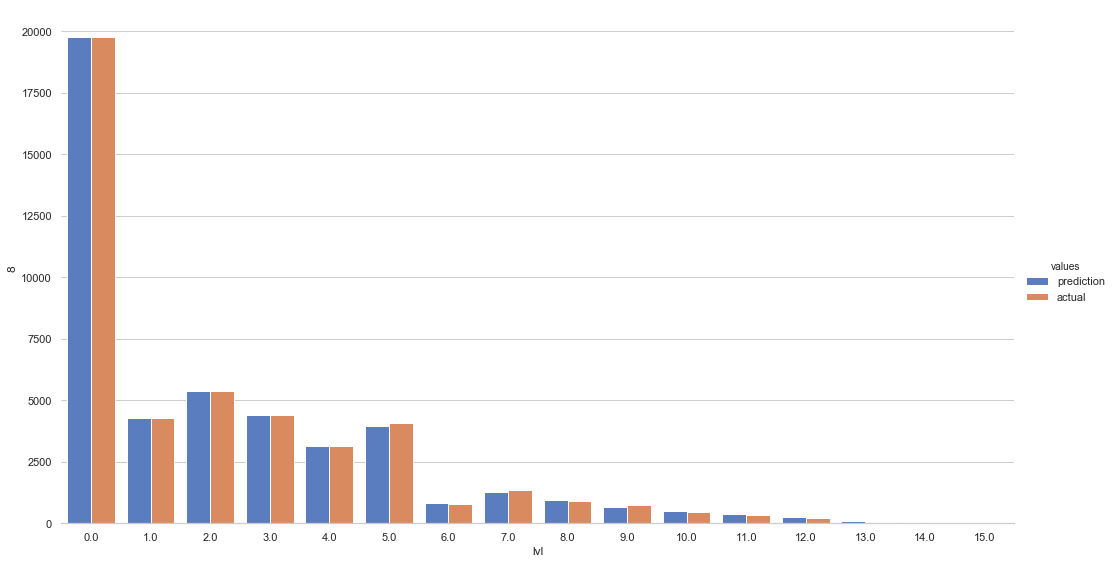

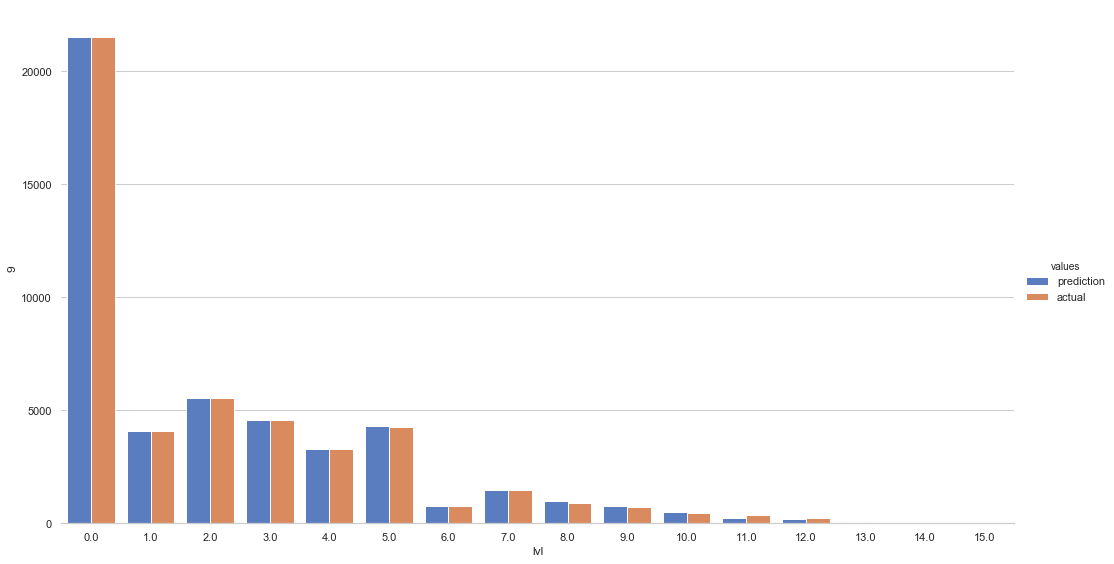

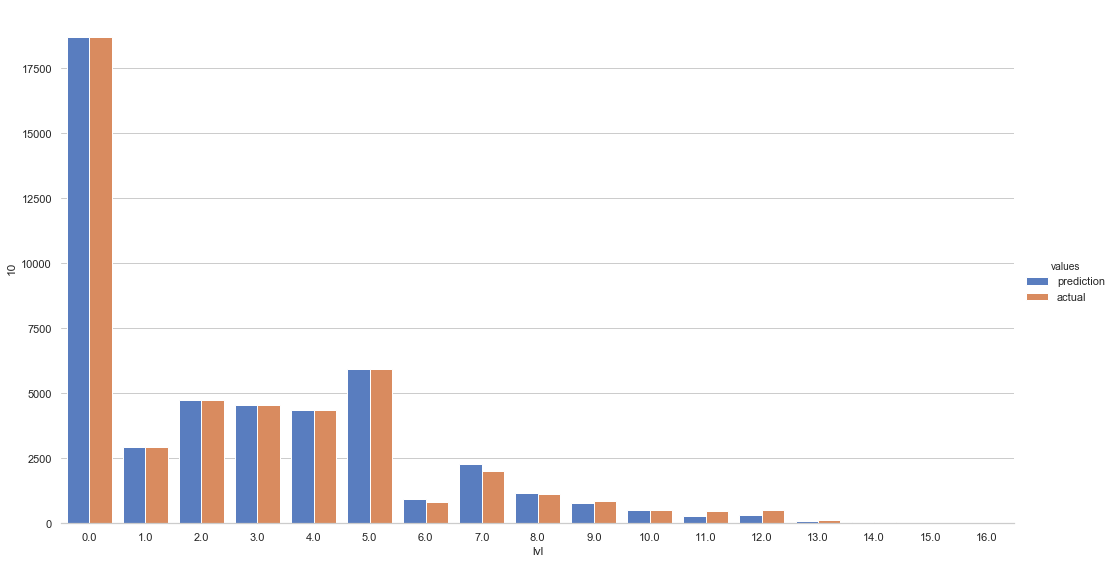

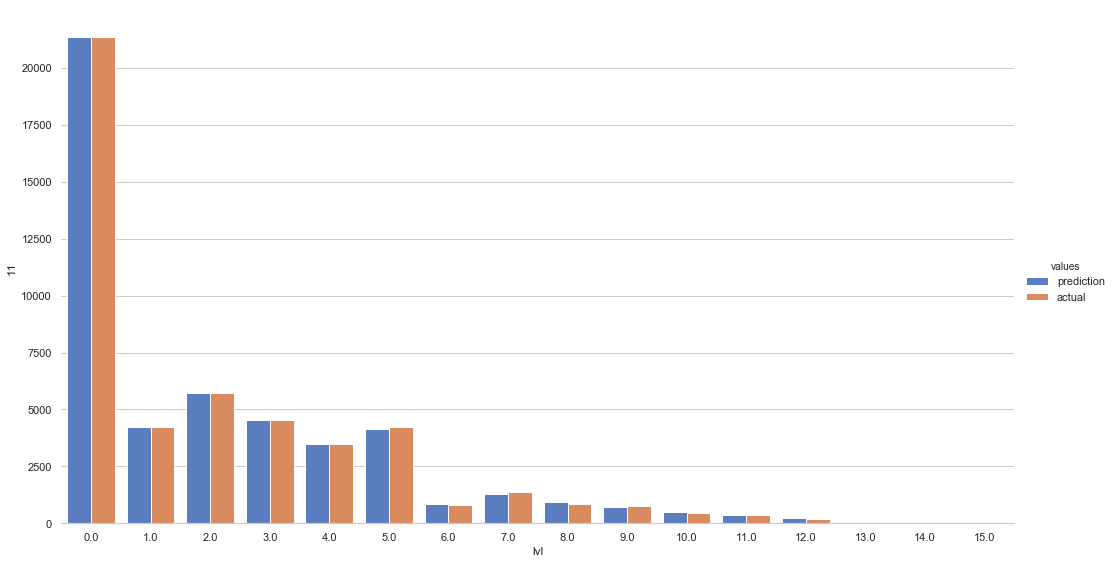

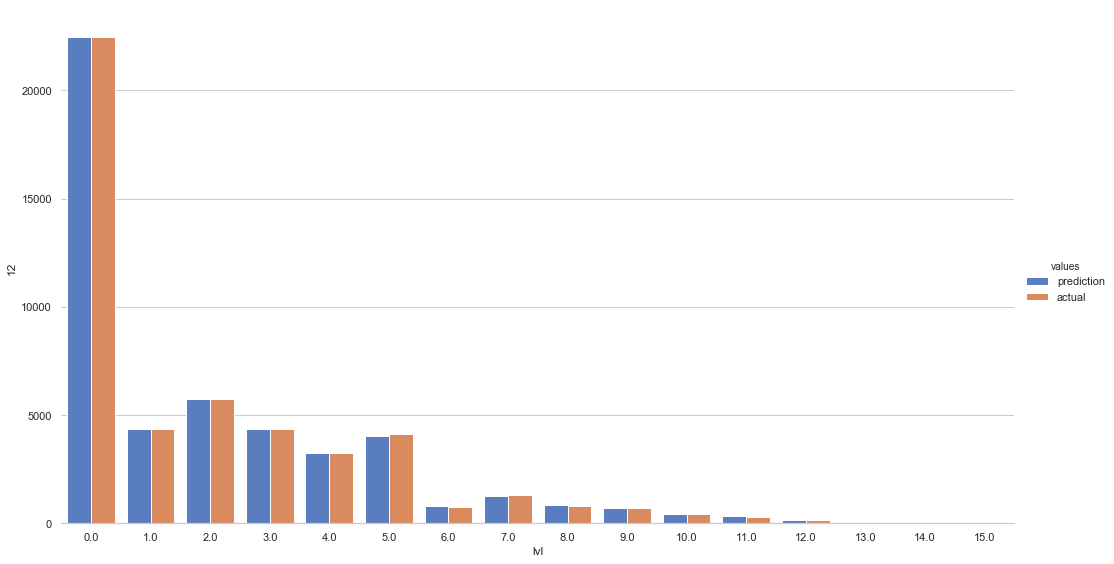

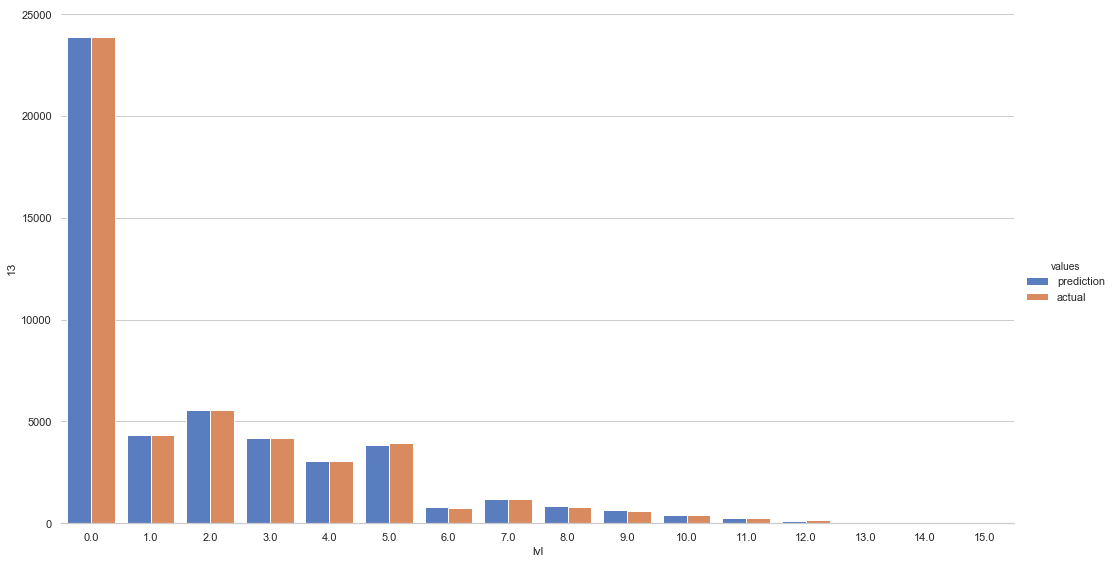

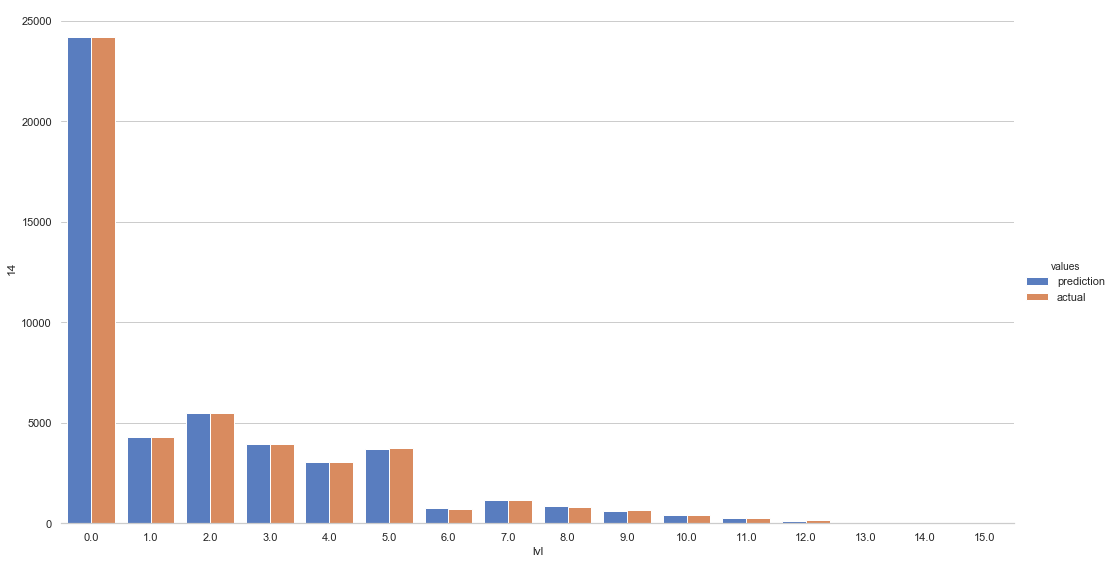

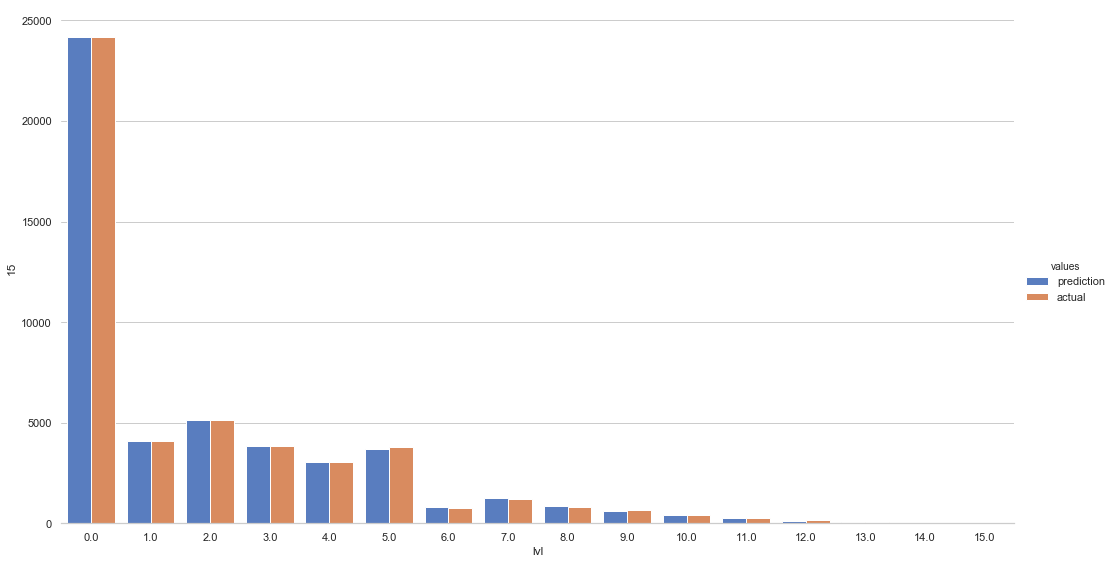

In [10]:
%%time
mean_error = []
for camp in range(3,16):
    train = data2[data2['CAMP'] < camp]
    val = data2[data2['CAMP'] == camp]
    
    xtr, xts = train.drop(['LVL'], axis=1), val.drop(['LVL'], axis=1)
    ytr, yts = train['LVL'].values, val['LVL'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    

    p = mdl.predict(xts)
    p = np.rint(p)
    predict = pd.Series(p)
    plot_difference(predict, val['LVL'], camp)
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (camp, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))